# Introduction to Machine Learning Exercise 2
## Problem 1
### a)
The covariance is given by
$$\text{Cov}(x_1,x_2)=\text{Cor}(x_1,x_2)\sqrt{\text{Var}(x_1)\text{Var}(x_2)}.$$
Using this we can form the covariance matrix with the given values.

In [2]:
import numpy as np

var1 = 2.0
var2 = 3.0
cor12 = -0.75
cov12 = cor12*np.sqrt(var1*var2)
sigma = np.array([[var1,cov12], [cov12,var2]])
mu = np.array([0.0, 0.0])


print(sigma)

[[ 2.         -1.83711731]
 [-1.83711731  3.        ]]


Next we evaluate the empirical covariance matrix.

In [3]:
np.random.seed(12345)

x = np.random.multivariate_normal(mu, sigma, size = 200)
print(np.cov(x, rowvar = False))

[[ 2.16835561 -1.97187366]
 [-1.97187366  3.11441553]]


And the correlation coefficient.

In [4]:
print(np.corrcoef(x, rowvar = False)[0,1])

-0.7587969124005565


As expected, the empirical values are close but not exactly the same as the exact values.

### b)
Some visualization below.

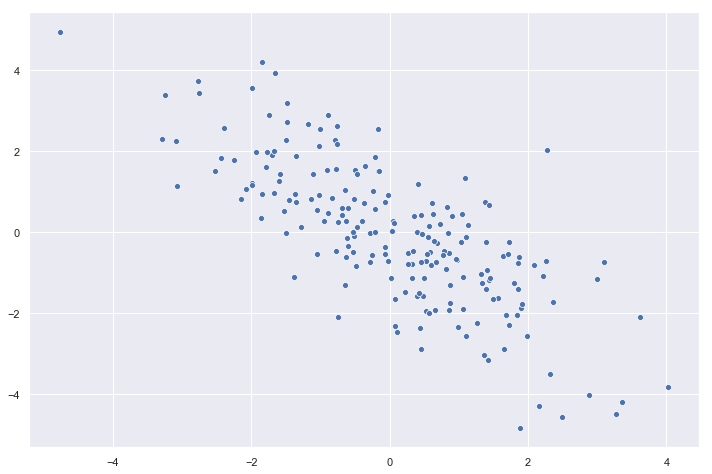

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.set()
ax = sns.scatterplot(x[:,0], x[:,1])

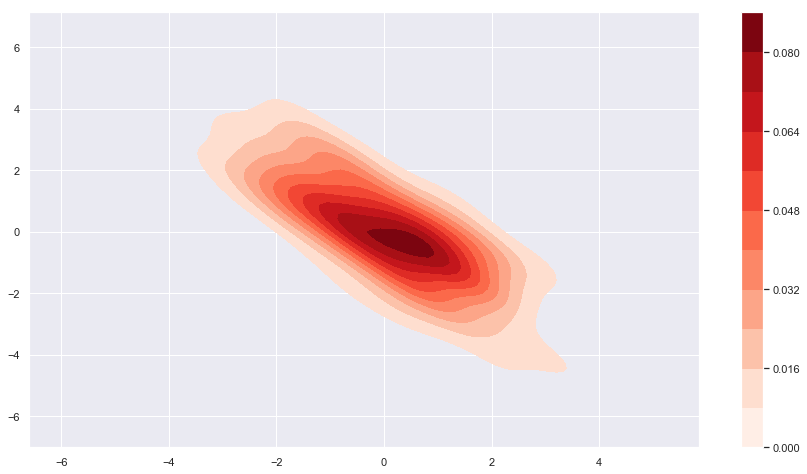

In [7]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(x[:,0], x[:,1], cmap="Reds", cbar=True, shade=True, shade_lowest=False)

AxisError: axis 1 is out of bounds for array of dimension 1

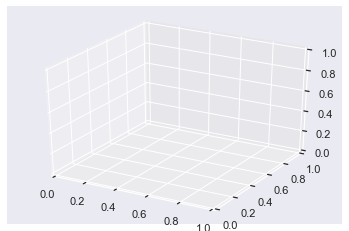

In [29]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

kde = gaussian_kde((x[:,0],x[:,1]))
z =kde.evaluate((x[:,0],x[:,1]))
np.append(z, np.zeros((len(z),1)), axis=1)
surf = ax.plot_surface(x[:,0], x[:,1], z, cmap=cm.coolwarm,
                                                      linewidth=0, antialiased=False)

### c)
Define a function to evaluate the density function.



[[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
  -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
  -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
  -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
  -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
  -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
  -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
  -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
  -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
  -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
  -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
  -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
  -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
   2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
   6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
   1.00000

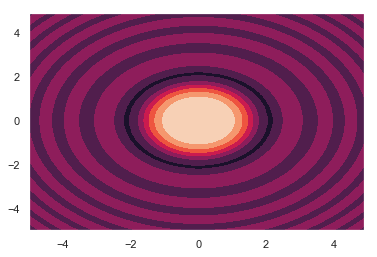

In [31]:
def density_function(x, mu, sigma):
    p = len(mu)
    
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
print(xx)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)


## Problem 2
###  a)

It's quite easy to evaluate the RHS and show that it's equivalent to the LHS. We begin by noting that for diagonal matrices the determinant is equal to the product of its diagonal entries. Because $\boldsymbol{\Sigma}$ is a diagonal matrix, the square root of its determinant is thus 
$$
|\boldsymbol{\Sigma}|^{1/2} = \left(\prod_{i=1}^p \sigma_i^2\right)^{1/2} = \prod_{i=1}^p \sigma_i,
$$
and assuming non-zero diagonal entries, its inverse is simply
$$
\boldsymbol{\Sigma}^{-1} = \text{diag}\left(\frac{1}{\sigma_1^2}, \dots , \frac{1}{\sigma_p^2}\right).
$$
Now we can already evaluate the matrix product in the exponent of the RHS:
$$
\begin{split}
(\mathbf{x} - \boldsymbol{\mu})^T	 \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) &= 
\begin{bmatrix}
x_1 - \mu_1 & \dots & x_p - \mu_p
\end{bmatrix}
\begin{bmatrix}
\frac{1}{\sigma_1^2} & 0 & \dots & 0 \\
0 & \frac{1}{\sigma_2^2} & \dots & 0 \\
\vdots & \vdots & & \vdots \\ 
0 & 0 & \dots & \frac{1}{\sigma_p^2}
\end{bmatrix}
\begin{bmatrix}
x_1-\mu_1 \\
\vdots \\
x_p - \mu_p
\end{bmatrix} \\
&= \begin{bmatrix}
\frac{x_1 - \mu_1}{\sigma_1^2} & \dots & \frac{x_p - \mu_p}{\sigma_p^2}
\end{bmatrix}
\begin{bmatrix}
x_1-\mu_1 \\
\vdots \\
x_p - \mu_p
\end{bmatrix} \\
&= \sum_{i=1}^p \frac{(x_i - \mu_i)^2}{\sigma_i^2}.
\end{split}
$$
Thus, the right hand side equals the left hand side.

### b)
Taking the natural logarithm of both sides we find
\begin{split}
\frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}e^{-b/2} &= a \\
e^{-b/2} &= a(2\pi)^{p/2}|\Sigma|^{1/2} \\
b &=-2\ln a -p\ln(2\pi)-\ln |\Sigma|.
\end{split}

The determinant is now $|\Sigma|=1\cdot2\cdot3=6$. Substituting $p=3$ and $a=1/100$ we get $b=1.90495$.



In [1]:

sigma = np.zeros((3,3))
np.fill_diagonal(sigma, [1,2,3])
a = 1/100
p = 3
b = -2*np.log(a)-p*np.log(2*np.pi)-np.log(np.linalg.det(sigma))

print(b)


1.9049497035200909


## Problem 3
### a)
The generative model does have a higher asymptotic error, but it also reaches this error faster than the discriminative one. As the sample size $n$ is increased, there appears two distinct regimes: one in which the generative model reaches its asymptotic error faster and is thus doing better and one where the discriminative model has already reached its lower asymptotic error. This implies that generative models may be more precise with small sample size, although discriminative models have usually been considered superior.

### b)
The discriminative model tries to maximize the conditional probability $p(\mathbf{y}|x)$ or to minimize the 0-1 training error, while the generative model tries to maximize the joint probability $p(\mathbf{x},y) $.

In the discrete case the probabilites $p(x_i|y)$ follow the Bernoulli distribution, while in the continuous case $p(x_i|y)$ are normally distributed. The generative-discriminative pairs are naive Bayes-logistic regression in the first case, and normal discriminant analysis-logistic regression in the latter.

### c)
The generative model indeed seems to reach the asymptotic error (much) faster than the discriminative one, but the discriminative one dominates when the number of training samples is large. In some cases the discriminative one is unable to reach the generative one, so it needs more training samples to reach its asymptotic limit. So the generative models might be better with low sample sizes, implied in part a).